# <font color='#32CD32'> **Seguimentação de Clientes**

## <font color='red'> **1. Situação Problema**


Uma empresa automobilística tem planos de entrar em novos mercados com seus produtos existentes (P1, P2, P3, P4 e P5). Após intensa pesquisa de mercado, eles deduziram que o comportamento do novo mercado é semelhante ao do mercado existente.

No mercado existente, a equipe de vendas classificou todos os clientes em 4 segmentos (A, B, C, D). Em seguida, eles realizaram divulgação e comunicação segmentadas para um segmento diferente de clientes. Esta estratégia funcionou excepcionalmente bem para eles. Eles planejam usar a mesma estratégia para os novos mercados e identificaram 2.627 novos clientes potenciais.

Você deve ajudar o gerente a prever o grupo certo de novos clientes.

link:
https://www.kaggle.com/datasets/kaushiksuresh147/customer-segmentation

## <font color='bluelight'> **2. Bibliotecas e Configurações**


In [1]:
# Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Configurações
pd.set_option('display.max_columns', 100)
sns.set_palette(palette='tab10')

## <font color='bluelight'> **3. Coleta de Dados**

* Os dados vieram já em train e test, mas vamos uni-los para tratar-los juntos e fazer nosso próprio modelo 

In [3]:
dados1 = pd.read_csv('../data/external/Test.csv')
dados2 = pd.read_csv('../data/external/Train.csv')

In [4]:
dados = pd.concat([dados1, dados2], axis=0)
dados

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6,B
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6,A
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6,A
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6,B
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1,D
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B


- ID: ID único
- Gender(Gênero): Gênero do cliente
- Ever_Married(Casado): Estado civil do cliente
- Age(Idade): Idade do cliente
- Graduated(Graduação): O cliente é graduado? 
- Profession(Profissao): Profissão do cliente
- Work_Experience(Experiencia): Experiência profissional em anos
- Spending_Score(Gasto cliente): Pontuação de gastos do cliente
- Family_Size(tamanho familia): Número de membros da família do cliente (incluindo o cliente)
- Var1: Categoria anônima para o cliente
- Segmentation: (alvo) Segmento de clientes do cliente

## <font color='bluelight'> **3. Análise Inicial dos Dados**


In [5]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10695 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               10695 non-null  int64  
 1   Gender           10695 non-null  object 
 2   Ever_Married     10505 non-null  object 
 3   Age              10695 non-null  int64  
 4   Graduated        10593 non-null  object 
 5   Profession       10533 non-null  object 
 6   Work_Experience  9597 non-null   float64
 7   Spending_Score   10695 non-null  object 
 8   Family_Size      10247 non-null  float64
 9   Var_1            10587 non-null  object 
 10  Segmentation     10695 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 1002.7+ KB


In [6]:
dados.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,10695.0,463468.088640,2600.966411,458982.0,461220.5,463451.0,465733.5,467974.0
Age,10695.0,43.511828,16.774158,18.0,30.0,41.0,53.0,89.0
Work_Experience,9597.0,2.619777,3.390790,0.0,0.0,1.0,4.0,14.0
Family_Size,10247.0,2.844052,1.536427,1.0,2.0,3.0,4.0,9.0


**Insights Iniciais:**

- Vemos que a "IDADE" não existe dados inconsistentes, idade está em torno de 18 a 89 anos.
- "EXPERIENCIA DE TRABALHO" não está inconsistente, vai de 0 a 14 anos.
- "TAMANHO DA FAMILÍA" não está inconsistentes, que esta em variando de 1 a 9 membros por famália.

## <font color='bluelight'> **4. Pré-processamento dos Dados**


### <font color='green'> **4.1 Tradução da Base de Dados**

In [7]:
colunas_traduzidas = ['ID', 'genero', 'casado', 'idade', 'graduacao', 'profissao',
                      'experiencia_de_trabalho', 'pontuacao_gasto', 'tamanho_familia',
                      'var_1', 'seguimentacao']

dados_profissoes = list(dados['Profession'].unique())
dados_profissoes_traduzido = ['engenheiro', 'assistencia_medica', np.nan, 'executivo',
                              'marketing', 'doutor', 'artista', 'advogado', 'entretenimento', 'dona_de_casa']

# traducao das colunas
dados.columns = colunas_traduzidas

# dados gerais
dados = dados.replace(['Female', 'Male', 'Yes', 'No'], ['FEMININO', 'MASCULINO', 'SIM', 'NAO'])

# dados da 'pontuacao_gasto'
dados['pontuacao_gasto'] = dados['pontuacao_gasto'].replace(['Low', 'Average', 'High'], ['BAIXO', 'MEDIO', 'ALTO'])

# dados da 'profissao'
dados['profissao'] = dados['profissao'].replace(dados_profissoes, dados_profissoes_traduzido).str.upper()

In [8]:
dados.head()

,ID,genero,casado,idade,graduacao,profissao,experiencia_de_trabalho,pontuacao_gasto,tamanho_familia,var_1,seguimentacao
0,458989,FEMININO,SIM,36,SIM,ENGENHEIRO,0.0,BAIXO,1.0,Cat_6,B
1,458994,MASCULINO,SIM,37,SIM,ASSISTENCIA_MEDICA,8.0,MEDIO,4.0,Cat_6,A
2,458996,FEMININO,SIM,69,NAO,NaN,0.0,BAIXO,1.0,Cat_6,A
3,459000,MASCULINO,SIM,59,NAO,EXECUTIVO,11.0,ALTO,2.0,Cat_6,B
4,459001,FEMININO,NAO,19,NAO,MARKETING,NaN,BAIXO,4.0,Cat_6,A


### <font color='green'> **4.2 Dados Inconsistentes**


In [9]:
# Restando o index 
dados.reset_index(drop=True, inplace=True)

### <font color='green'> **4.3 Dados Duplicados**


In [10]:
dados.shape

(10695, 11)

In [11]:
print(f'Quantidade de dados publicados:')
dados.duplicated().sum()

Quantidade de dados publicados:


38

In [12]:
dados.iloc[[2659]]

,ID,genero,casado,idade,graduacao,profissao,experiencia_de_trabalho,pontuacao_gasto,tamanho_familia,var_1,seguimentacao
2659,462454,MASCULINO,NAO,19,NAO,ASSISTENCIA_MEDICA,1.0,BAIXO,3.0,Cat_2,D


In [13]:
dados_duplicados = dados[dados.duplicated()]
dados_duplicados.head()

,ID,genero,casado,idade,graduacao,profissao,experiencia_de_trabalho,pontuacao_gasto,tamanho_familia,var_1,seguimentacao
2659,462454,MASCULINO,NAO,19,NAO,ASSISTENCIA_MEDICA,1.0,BAIXO,3.0,Cat_2,D
2820,467539,MASCULINO,SIM,48,SIM,ARTISTA,NaN,MEDIO,4.0,Cat_7,C
2983,465175,FEMININO,NAO,22,NAO,DONA_DE_CASA,0.0,BAIXO,4.0,Cat_6,D
3464,461837,MASCULINO,SIM,37,SIM,ARTISTA,0.0,BAIXO,2.0,Cat_6,C
3548,466905,MASCULINO,SIM,62,SIM,ARTISTA,0.0,BAIXO,1.0,Cat_6,B


In [14]:
dados.drop_duplicates(inplace=True)

In [15]:
dados.shape

(10657, 11)

### <font color='green'> **4.4 Dados Ausentes**


**Métodos para exclusão de dados ausentes:**
 
1 - Remoção de dados ausentes:
 - **Listwise deletion** --> (Utilizado):
   - Remove todas as linhas que contenham pelo menos um valor ausente.
 - Column-wise deletion:
   - Remove colunas que possuam muitos valores ausentes.

2 - Preenchimento de dados ausentes:
 - Preenchimento por média ou mediana
 - Preenchimento por valor constante
 - Preenchimento avançado

3 - Métodos de imputação:
 - Ignorar o objeto
 - Manual
 - Constante Global
 - Hot-deck: valor de objeto similar aleatório
 - valor da ultima observação:
    - Ordenação de um ou mais atributos

4 - Agrupamento

5 - Predição (algoritmos de ml)

6 - Aproximação

In [16]:
print(f'Quantidade de dados ausentes:')
dados.isnull().sum()

Quantidade de dados ausentes:


ID                            0
genero                        0
casado                      189
idade                         0
graduacao                   100
profissao                   162
experiencia_de_trabalho    1090
pontuacao_gasto               0
tamanho_familia             447
var_1                       108
seguimentacao                 0
dtype: int64

In [17]:
total_dados_nulos = dados.isnull().sum().sum()
total_dados_nulos

2096

In [18]:
dados.dropna(axis=0, inplace=True)

print(f'Total de dados nulos excluidos: {total_dados_nulos}')

Total de dados nulos excluidos: 2096


In [19]:
dados.head()

,ID,genero,casado,idade,graduacao,profissao,experiencia_de_trabalho,pontuacao_gasto,tamanho_familia,var_1,seguimentacao
0,458989,FEMININO,SIM,36,SIM,ENGENHEIRO,0.0,BAIXO,1.0,Cat_6,B
1,458994,MASCULINO,SIM,37,SIM,ASSISTENCIA_MEDICA,8.0,MEDIO,4.0,Cat_6,A
3,459000,MASCULINO,SIM,59,NAO,EXECUTIVO,11.0,ALTO,2.0,Cat_6,B
5,459003,MASCULINO,SIM,47,SIM,DOUTOR,0.0,ALTO,5.0,Cat_4,C
6,459005,MASCULINO,SIM,61,SIM,DOUTOR,5.0,BAIXO,3.0,Cat_6,D


In [20]:
dados.to_csv('../src/data/dados_limpos.csv')

### <font color='green'> **4.5 Outliers**


<Axes: >

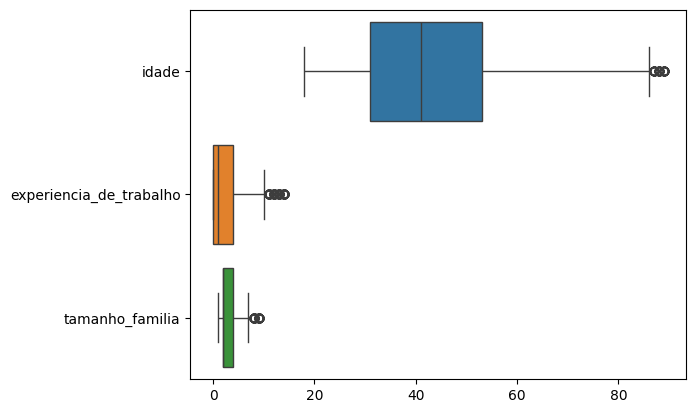

In [30]:
sns.boxplot(dados.drop('ID', axis=1), orient='h')

## <font color='bluelight'> **5. Análise Descritiva dos Dados**


### <font color='green'> **5.1 Gênero**


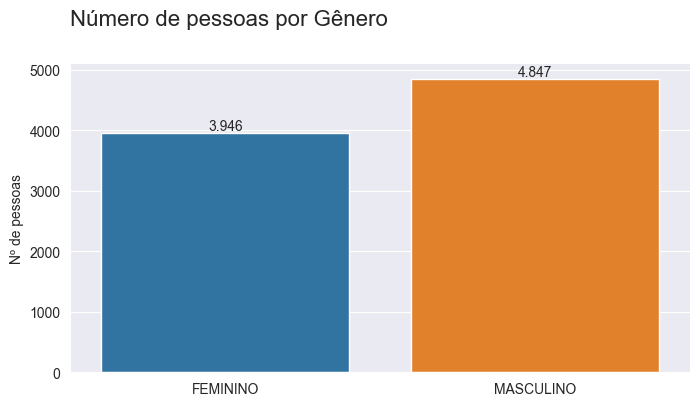

In [191]:
fig, ax = plt.subplots(figsize=(8,4))

ax = sns.countplot(data=dados, x='genero', ax=ax, hue='genero')
ax.set_title('Número de pessoas por Gênero', fontsize=16, loc='left', y=1.1)
ax.set_xlabel('')
ax.set_ylabel('Nº de pessoas', )
ax.spines[['right', 'top']].set_visible(False)

for i, v in enumerate(sorted(dados['genero'].value_counts().values)):   # Precisamos ordenar os dados 
    valor = f'{v:,.0f}'.replace(',','.')
    ax.text(x= i, y= v, s=valor, va='bottom', ha='center')

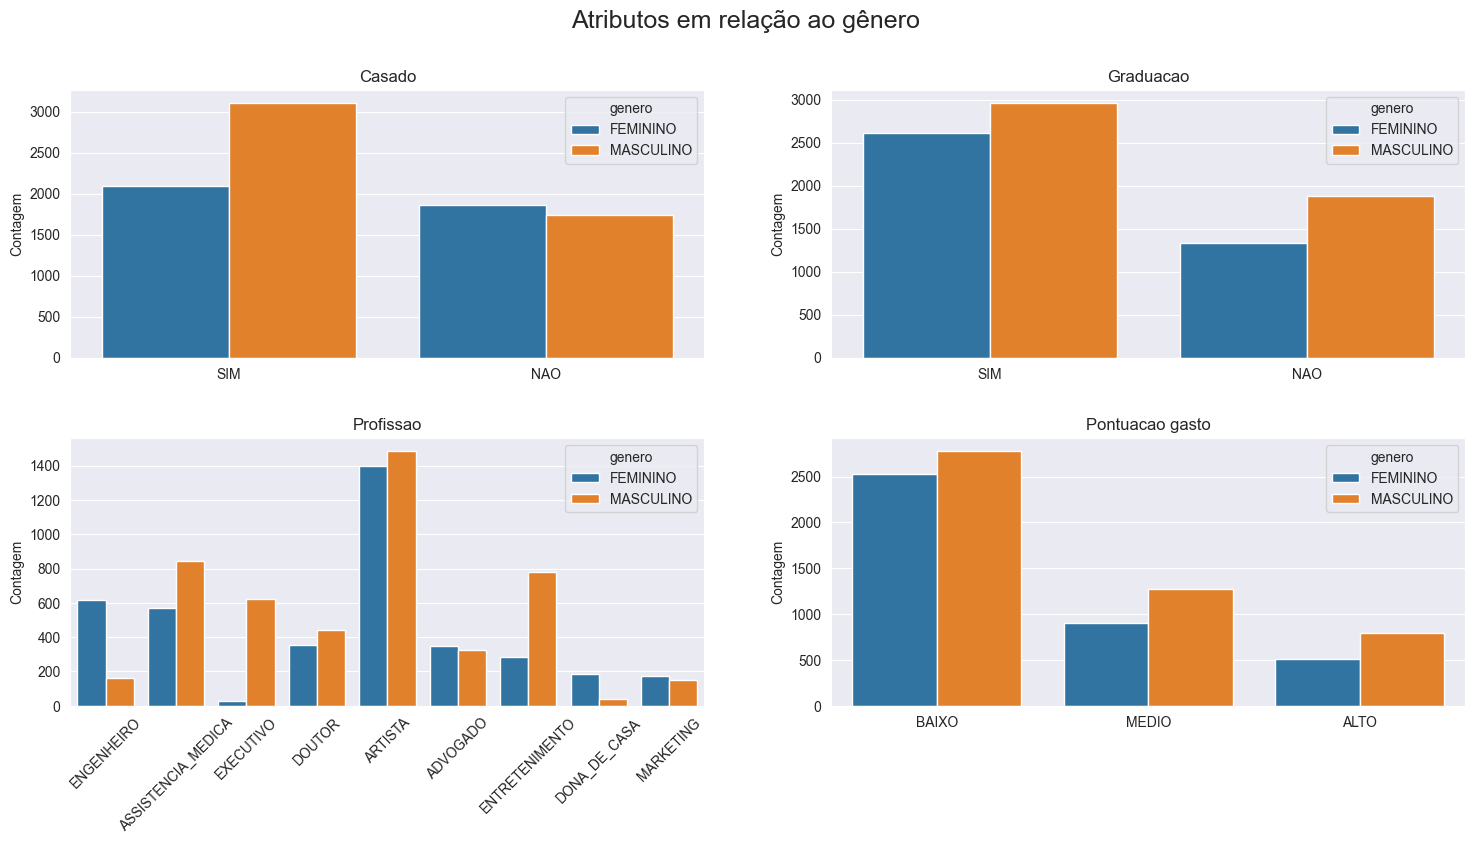

In [190]:
# Dados em relação ao gênero
colunas = ['casado', 'graduacao', 'profissao', 'pontuacao_gasto']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18,8))

plt.suptitle('Atributos em relação ao gênero', fontsize=18)
fig.subplots_adjust(hspace=0.3) 


for i, v in enumerate(axes.flatten()):
    axs = sns.countplot(data=dados, x=colunas[i], hue='genero', ax=v)
    axs.set_title(f'{colunas[i]}'.capitalize().replace('_',' '))
    axs.set_xlabel('')
    axs.set_ylabel('Contagem')
    for label in axs.get_xticklabels():  # Ajuste na rotação dos rótulos
        if i == 2:                       # Rotacionar somente o gráfico que tem string grande que dificulta a visualização
            label.set_rotation(45)


Insights:

- Gráfico 1 (Casado):
   - Existem mais pessoas do sexo masculino casadas que dos sexo feminino

- Gráfico 2 (Graduação):
   - Na base de dados existem mais graduados, mais homens que mulhers
   - Os não graduados, também existem mais homens que mulheres

- Gráfico 3 (Profissão):
   - Existem mais artistas que outras profissoes

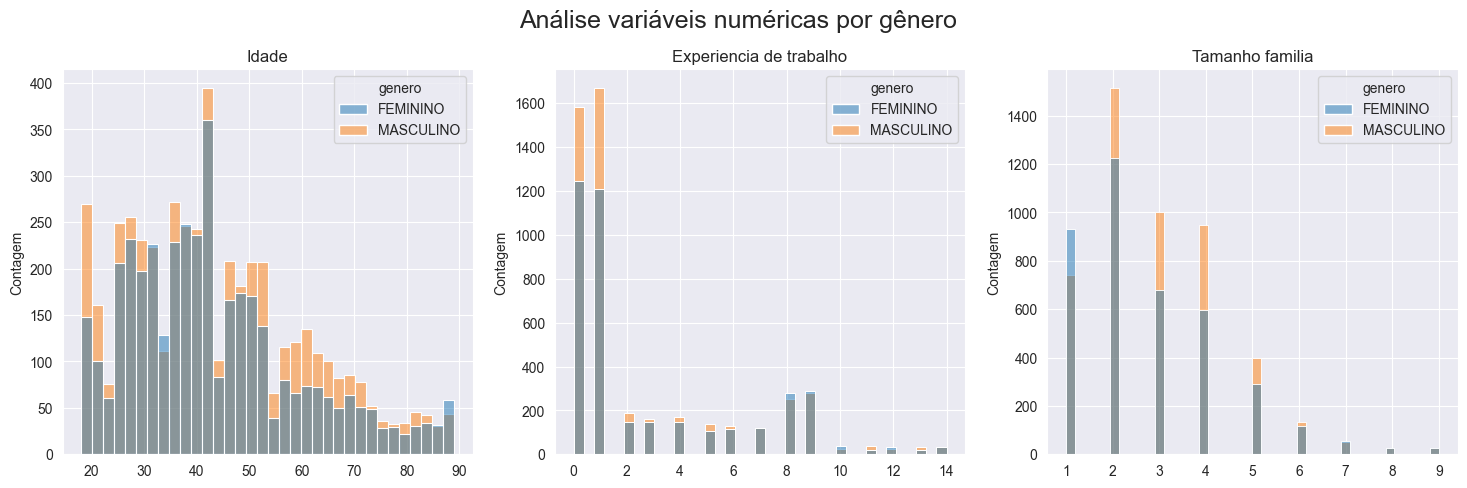

In [259]:
colunas_numericas = dados.drop('ID', axis=1).select_dtypes(exclude='object').columns

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))
plt.suptitle('Análise variáveis numéricas por gênero', fontsize=18, y=1)

for i, v in enumerate(colunas_numericas):
    sns.histplot(data=dados, x=v, hue='genero', ax=axes[i])
    axes[i].set_title(f'{v}'.capitalize().replace('_', ' '))
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Contagem')

plt.show()

### <font color='green'> **5.2 Estado Civil**

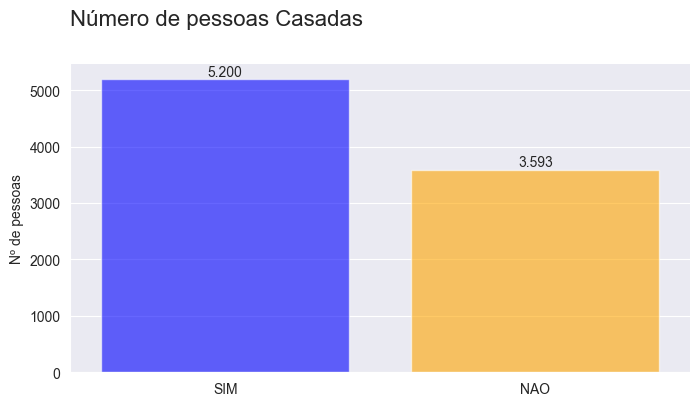

In [189]:
fig, ax = plt.subplots(figsize=(8,4))

ax = sns.countplot(data=dados, x='casado', ax=ax, hue='casado', palette=['blue', 'orange'], saturation=1, alpha=0.6)
ax.set_title('Número de pessoas Casadas', fontsize=16, loc='left', y=1.1)
ax.set_xlabel('')
ax.set_ylabel('Nº de pessoas', )
ax.spines[['right', 'top']].set_visible(False)

for i, v in enumerate(dados['casado'].value_counts().values):   # Precisamos ordenar os dados 
    valor = f'{v:,.0f}'.replace(',','.')
    ax.text(x= i, y= v, s=valor, va='bottom', ha='center')

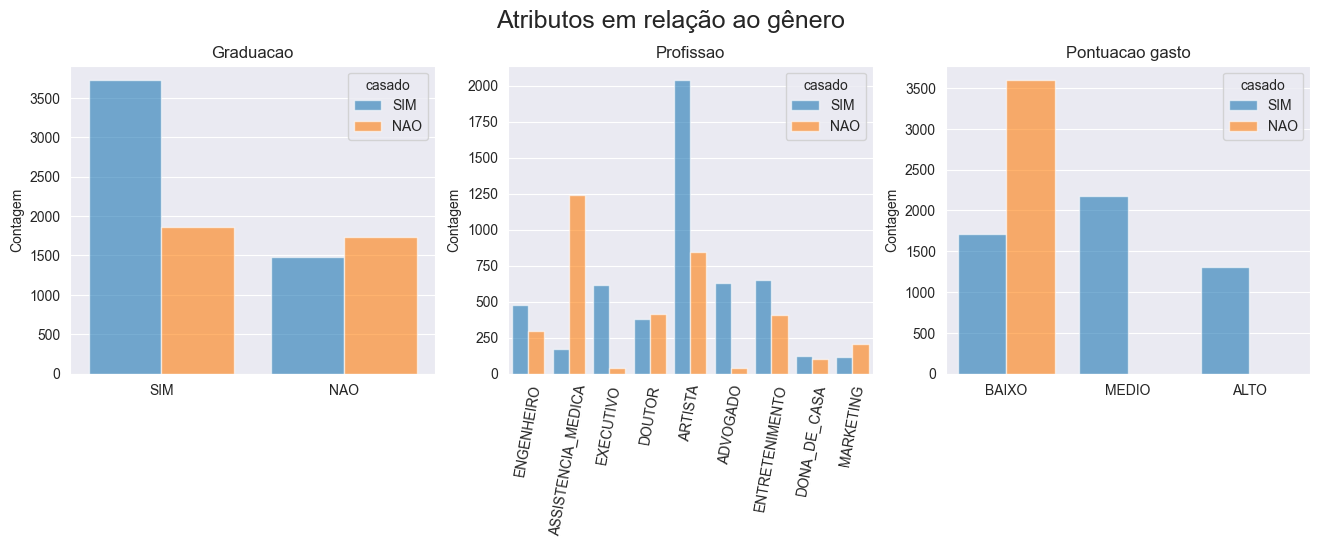

In [184]:
colunas = ['graduacao', 'profissao', 'pontuacao_gasto']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,4))

plt.suptitle('Atributos em relação ao gênero', fontsize=18, y=1.02)
fig.subplots_adjust(hspace=0.3) 

for i, v in enumerate(axes.flatten()):
    axs = sns.countplot(data=dados, x=colunas[i], hue='casado', ax=v, orient='h', saturation=1, alpha=0.6)
    axs.set_title(f'{colunas[i]}'.capitalize().replace('_',' '))
    axs.set_xlabel('')
    axs.set_ylabel('Contagem')
    for label in axs.get_xticklabels():  # Ajuste na rotação dos rótulos
        if i == 1:                       # Rotacionar somente o gráfico que tem string grande que dificulta a visualização
            label.set_rotation(80)

Insights:

- Gráfico 1 (Graduação):
   - Pessoas casadas apresentam ter graduação em relação a não casadas

- Gráfico 2 (Profissão):
   - Vemos que temos muitos artistas nos dados e a maioria são casados

- Gráfico 3 (Profissão):
   - Maioria que apresentam pontuação baixa e não são casados

### <font color='green'> **5.3 Idade**

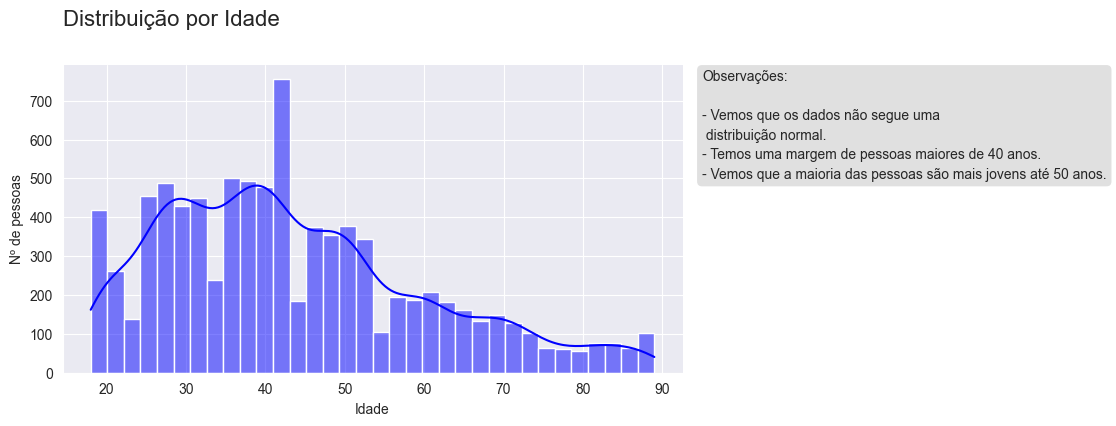

In [267]:
fig, ax = plt.subplots(figsize=(8,4))
sns.set_style('darkgrid')
ax = sns.histplot(data=dados, x='idade', kde=True, color='blue')

ax.set_title('Distribuição por Idade', fontsize=16, loc='left', y=1.1)
ax.set_xlabel('Idade')
ax.set_ylabel('Nº de pessoas', )
ax.spines[['right', 'top']].set_visible(False)

ax.text(x=95, y=500, s='Observações:\n\n'
        '- Vemos que os dados não segue uma\n distribuição normal.\n'
        '- Temos uma margem de pessoas maiores de 40 anos.\n'
        '- Vemos que a maioria das pessoas são mais jovens até 50 anos.',
        bbox=dict(boxstyle="round", fc='#E0E0E0', ec='#E0E0E0'),
        linespacing=1.5)

plt.show()


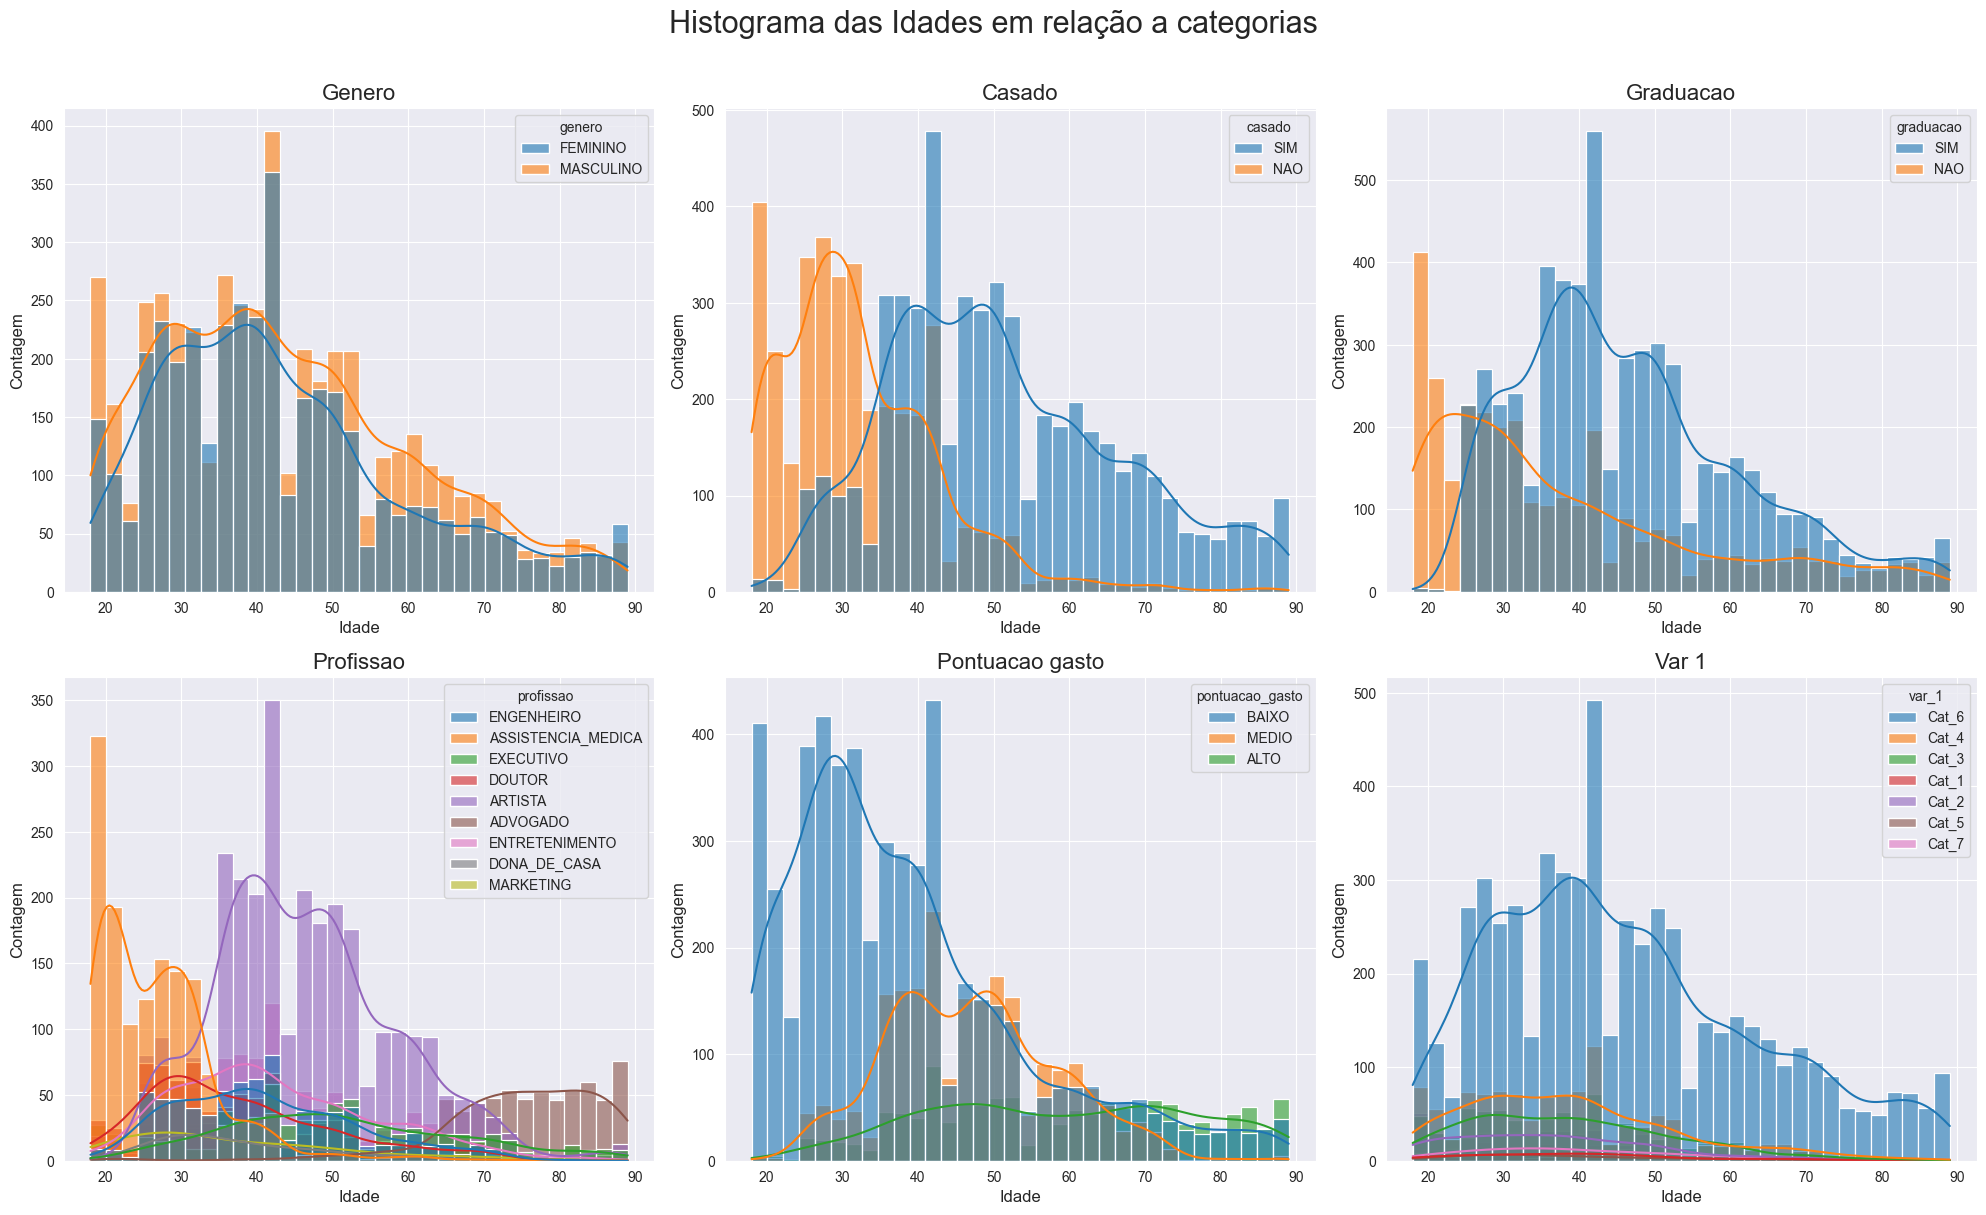

In [256]:
colunas_categoricas = dados.drop('seguimentacao', axis=1).select_dtypes(include='object').columns

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20,12))
plt.suptitle('Histograma das Idades em relação a categorias', fontsize=22, y=1.01)

for i, v in enumerate(axs.flatten()):
    ax = sns.histplot(data=dados, x='idade', hue=colunas_categoricas[i], kde=True, ax=v, alpha=0.6)
    ax.set_title(f'{colunas_categoricas[i]}'.replace('_', ' ').capitalize(), fontsize=16)
    ax.set_ylabel('Contagem', fontsize=12)
    ax.set_xlabel('Idade', fontsize=12)


plt.tight_layout(pad=1.2)
plt.show()

Insights:
 
- Gráfico 2 (Estado Civil):
   - Pessoas ate 35 anos são pessoas solteiras e acima são maioria os casados.

- Gráfico 2 (graduação):
   - Pessoas acima de 25 anos tendem a ter já o nível superior.

- Gráfico 3 (Profissão):
   - Pessoas jovens de 20 a 30 anos, tendem a ter a profissão de na área da saúde
   - Pessoas entre 35 a 70 anos, a maioria tem a profissão de Artista
   - Já os mais Idosos acima de 70 anos tem a grande maioria a profissao de Advogado e bem pequena de executivo

- Gráfico 3 (Pontuação):
   - Pessoas mais jovens tendem a ter uma pontuação baixa
   - Pessoas com idade entre 35 a 60, melhoram sua pontuação a médio

- Gráfico 4 (Var1):
   - Maioria das pessoas tem classificação de CAT6

### <font color='green'> **5.4 Graduação**

## <font color='bluelight'> **6. Seleção de Atributos** 

## <font color='bluelight'> **7. Machine Learning**


### <font color='green'> **7. Treinamento do Modelo**


### <font color='green'> **8. Avaliação do Modelo**


### <font color='green'> **9. Ajuste do Modelo**


### <font color='green'> **10. Modelo Final**


## <font color='#4169E1'> **8. Modelo Final**